# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [98]:
def hist_comp_prop(group: str,df1,df2, title:str):
    # Compares all the numeric columns of two dataframes and plot an overlayed histogram
    import math
    
    try:
        df1.columns.all() == df2.columns.all()
    except:
        print("Dataframes must have the same column names and positions. Prepare data before use this function")
    
    df_full = pd.concat([df1,df2])
    fig = plt.figure(figsize = [14,14])
    elem = sorted(set(df_full[group]))
    a = 1
    alpha = {}
    for e in elem:
        alpha[e] = a
        a = a/2
    
    #Selecting only the numeric columns 
    col = df1.select_dtypes(include=np.number).columns
    
    #Identifying the matrix plot size
    c = len(col)
    root = math.sqrt(c)
    check_size = False
    while check_size == False:
        if int(root+0.5)**2 == c:
            check_size = True
            s = math.sqrt(c)
        else:
            c += 1
            root = math.sqrt(c)
    matrix_fig = [int(s),int(s)]
    
    for ind, column in enumerate(col):
        #Creating the bins based on the combination of both df
        bins = np.linspace(df_full[column].min(), df_full[column].max(), 10)
        
        plt.subplot(matrix_fig[0], matrix_fig[1], ind+1)
        subNum = 0
        for ind, grp in df_full.groupby(group):
            grp[column].hist(bins=bins, density = True, label = ind, alpha = alpha[list(alpha)[subNum]])
            subNum +=1
        plt.title(column)
        plt.legend()
    fig.suptitle(title, fontsize=30)

    
def class_plot (df1, df2,label1, label2,column):
    # Compares one class column of two dataframes bringing a bar chart of each df 
    try:
        df1.columns.all() == df2.columns.all()
    except:
        print("Dataframes must have the same column names and positions. Prepare data before use this function")
    fig = plt.figure(figsize = [10,5])
    df_full = pd.concat([df1,df2])
    bins = df_full[column].value_counts().index.tolist()
    df_comb_size = df_full.shape[0]
    h1 = (df1[column].value_counts().sort_index()/df_comb_size)
    h2 = (df2[column].value_counts().sort_index()/df_comb_size)
    cap = max(np.append(h1, h2))*1.1
    fig_title = f"Comparison of {column} for {label1} and {label2} Vehicles"
    
    plt.subplot(1, 2, 1)
    plt.ylim(0,cap)
    h1.plot(kind='bar', title = label1)
    plt.subplot(1, 2, 2)
    plt.ylim(0,cap)
    h2.plot(kind='bar', title = label2)
    fig.suptitle(fig_title, fontsize=30, y = 1.1)


In [3]:
# load datasets

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [4]:
df_08.fuel.value_counts().to_frame().reset_index()

,index,fuel
0,Gasoline,984
1,gas,1
2,CNG,1
3,ethanol,1


In [5]:
df_18.fuel.value_counts().to_frame().reset_index()

,index,fuel
0,Gasoline,749
1,Gas,26
2,Ethanol,26
3,Diesel,19
4,Electricity,12


In terms of amount of alternative fuels we can affirm that 1 new alternative source was added in 2018: Electricity.
However, we notice that relatively more models are using alternative sources, if we compare to Gasoline, which is the more frequent fuel source.
Taking ethanol as an example, in 2008 it corresponded to only 0.1%  of the sample, while in 2018 it corresponds to more than 3% of the sample. The same happens for Gas source.

Considering Ethanol, Gas, CNG and Electricity as alternative fuel sources we can check:

In [6]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol", "gas", "Ethanol", "Electricity", "Gas"]').model.nunique()
alt_08

2

In [7]:
alt_18 = df_18.query('fuel in ["CNG", "ethanol", "gas", "Ethanol", "Electricity", "Gas"]').model.nunique()
alt_18

26

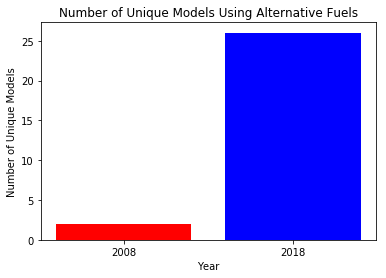

In [8]:
plt.bar(["2008", "2018"], [alt_08, alt_18], color = ['r','b'])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

In [9]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [10]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

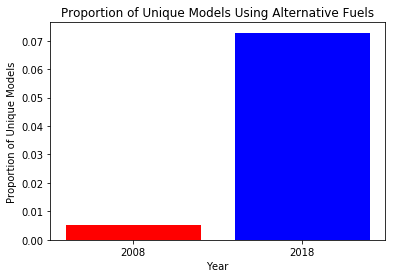

In [11]:
plt.bar(["2008", "2018"], [prop_08, prop_18], color = ['r','b'])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

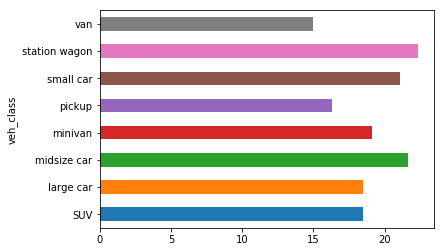

In [12]:
veh_class_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_class_08.plot(kind = 'barh');

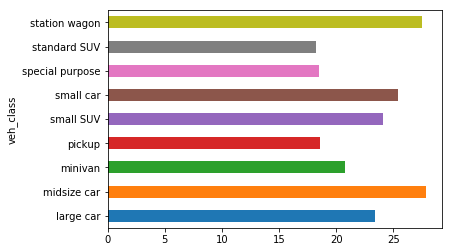

In [13]:
veh_class_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_class_18.plot(kind = 'barh');

In [14]:
econ_compar = veh_class_18 - veh_class_08
econ_compar

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

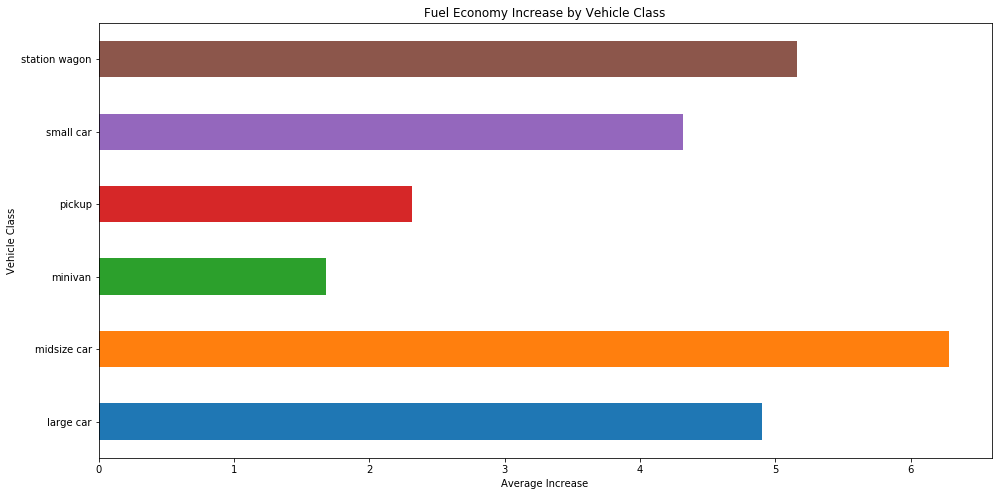

In [15]:
# Only considering the models that exist in both datasets

econ_compar.dropna(inplace = True)
econ_compar.sort_values()
econ_compar.plot(kind = 'barh', title = 'Fuel Economy Increase by Vehicle Class', figsize = (16,8))
plt.xlabel('Average Increase')
plt.ylabel('Vehicle Class');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [16]:
# Finding smartway values for each dataset
print("df_08 -> ", df_08.smartway.unique())
print("df_18 -> ", df_18.smartway.unique())

df_08 ->  ['no' 'yes']
df_18 ->  ['No' 'Yes' 'Elite']


##### Since we are evaluation only over the existence of SmartWay, let's simplify the values in this field to 'yes' and 'no' only

In [17]:
df_18_simp = df_18.replace({'smartway':{'Yes': 'yes', 'Elite': 'yes', 'No': 'no'}})
#adding a year column to identify the dataset
df_18_simp['year'] = '2018'
df_08_simp = df_08.copy()
df_08_simp['year'] = '2008'

##### Creating the datasets for the analysis

In [18]:
df_08_smart_yes = df_08_simp.query("smartway == 'yes'")
df_08_smart_no = df_08_simp.query("smartway != 'yes'")

df_18_smart_yes = df_18_simp.query("smartway == 'yes'")
df_18_smart_no = df_18_simp.query("smartway != 'yes'")

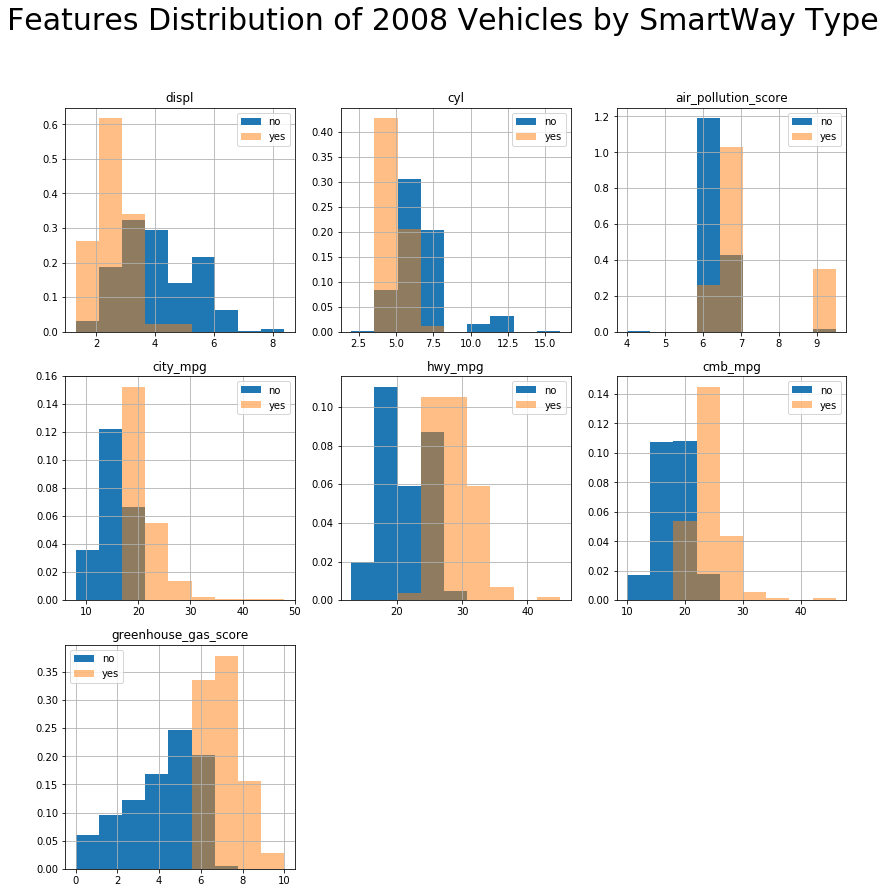

In [19]:
# Checking 2008 Data
chart_title = "Features Distribution of 2008 Vehicles by SmartWay Type"
hist_comp_prop('smartway', df_08_smart_yes, df_08_smart_no, chart_title)

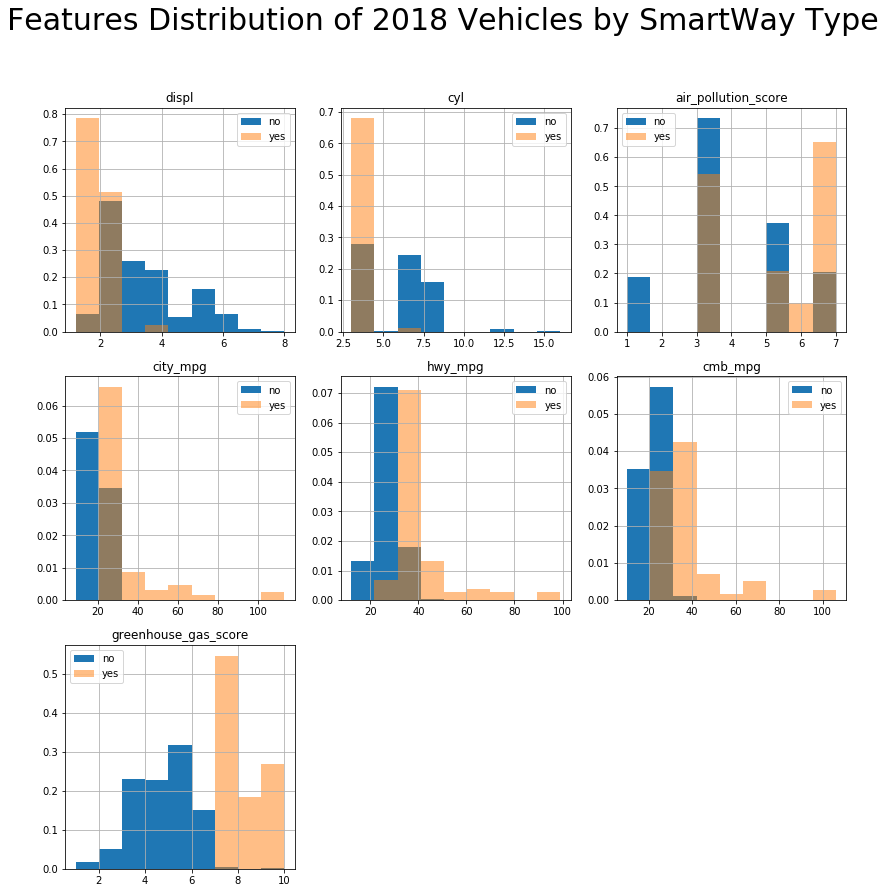

In [20]:
chart_title = "Features Distribution of 2018 Vehicles by SmartWay Type"
hist_comp_prop('smartway', df_18_smart_yes, df_18_smart_no, chart_title)

We can notice that there is a clear difference between the vehicles that have smartway and those that don't. Basically the smartway provides a better mpg performance while have a better greenhouse score.

### Comparing smartway vehicles over time


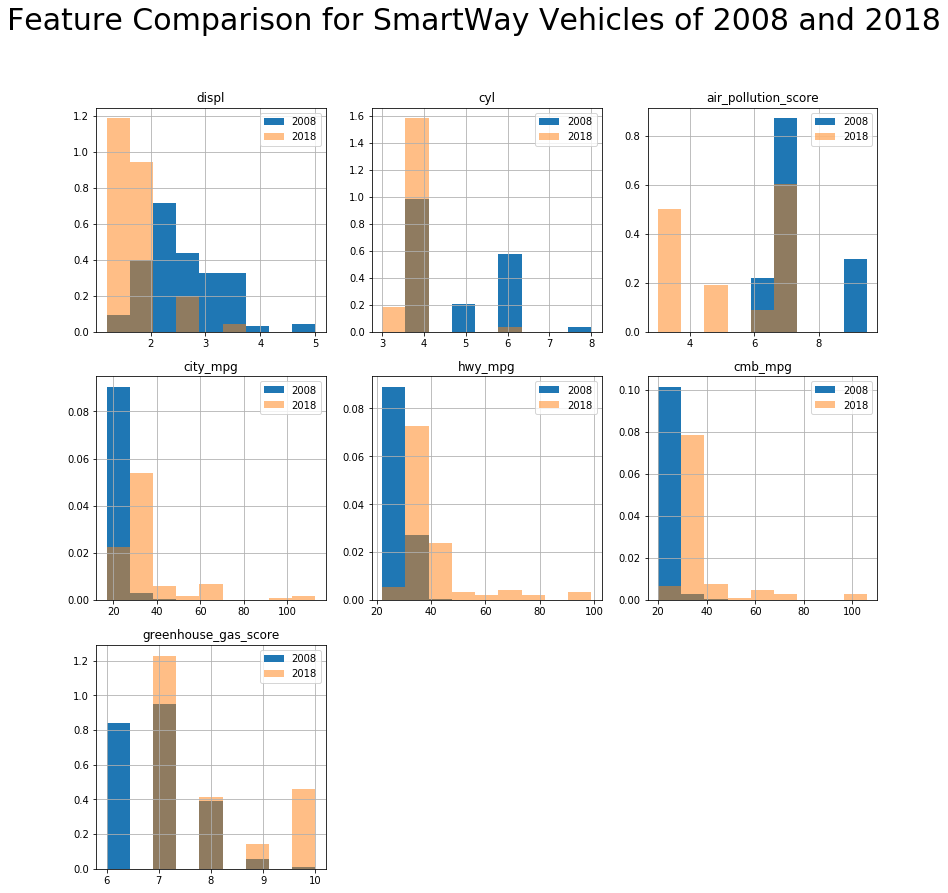

In [32]:
# comparison of the vehicles from 2008 and 2018
chart_title = "Feature Comparison for SmartWay Vehicles of 2008 and 2018"
hist_comp_prop('year', df_08_smart_yes, df_18_smart_yes, chart_title)

#### The most evident feature that differentiate both samples is the displacement. The vehicles from 2018 have a lower displacement value compared to 2008.
#### When it comes to mpg, the vehicles from 2018 have a much better performance compared to 2008's

### Q4: What features are associated with better fuel economy?

In [22]:
# First checking for 2008    
df_08.cmb_mpg.describe()

count    987.000000
mean      19.788247
std        4.251565
min       10.000000
25%       17.000000
50%       20.000000
75%       22.000000
max       46.000000
Name: cmb_mpg, dtype: float64

In [104]:
# Let's classify the vehicles as with good and bad fuel performance
    # For 2008
df_08_good_perf = df_08.query("cmb_mpg >= cmb_mpg.mean()").copy().reset_index(drop = True)
df_08_bad_perf = df_08.query("cmb_mpg < cmb_mpg.mean()").copy().reset_index(drop = True)
df_08_good_perf["fuel_performance"] = "good"
df_08_bad_perf["fuel_performance"] = "bad"

    # For 2018

df_18_good_perf = df_18.query("cmb_mpg >= cmb_mpg.mean()").copy().reset_index(drop = True)
df_18_bad_perf = df_18.query("cmb_mpg < cmb_mpg.mean()").copy().reset_index(drop = True)
df_18_good_perf["fuel_performance"] = "good"
df_18_bad_perf["fuel_performance"] = "bad"

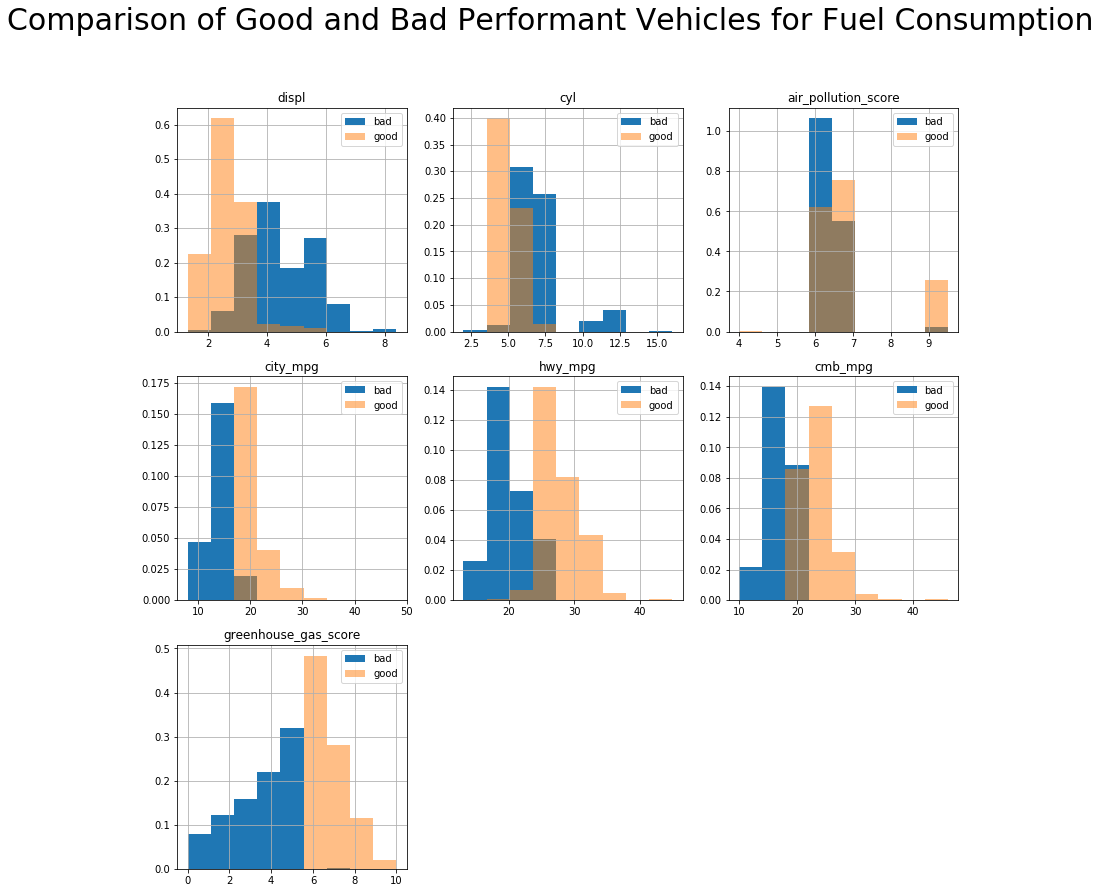

In [107]:
chart_title = "Comparison of Good and Bad Performant Vehicles for Fuel Consumption "
hist_comp_prop('fuel_performance', df_08_good_perf, df_08_bad_perf, chart_title)

The displacement value is much smaller for the good performant, so is its cylinder size. The greenhouse score is also evidently higher in the good performant vehicles.

## Checking if the vehicle class might have an influence in the performance

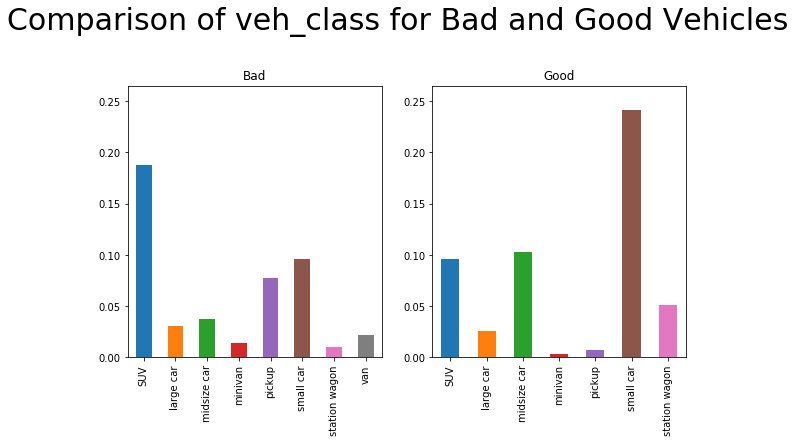

In [99]:
class_plot(df_08_bad_perf, df_08_good_perf, 'Bad', 'Good', 'veh_class')
    

As we can see, most of the bad performant cars are SUVs or pickups. There is a considerable portion of these vehicles that are in the small car group. Perhaps they lie in the merged area of the cmb_mpg chart.
When it comes to better performant vehicles, the big majority is concentrated in the small car group, which can give us an assumption that there is a big chance of a small car to have good performance in terms of fuel usage.

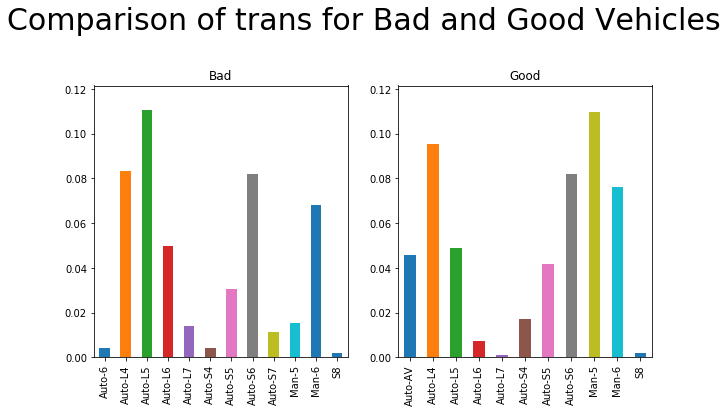

In [102]:
class_plot(df_08_bad_perf, df_08_good_perf, 'Bad', 'Good', 'trans')

For this class, it is harder to conclude, because each transmission type has a similar weight in terms of importance. Since other classes are more evident, I would recommend to leave this class aside and do a deeper check.

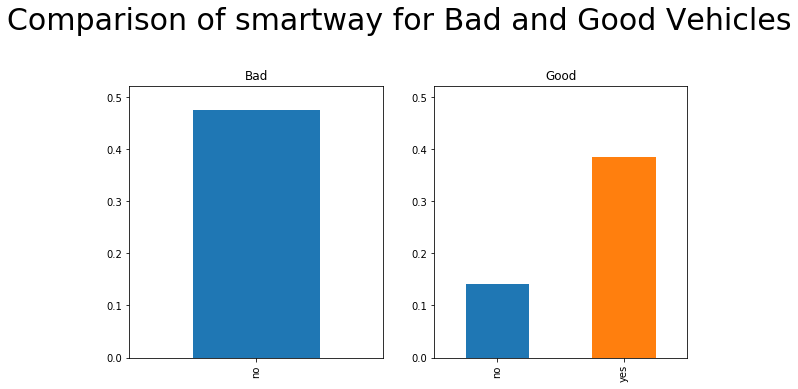

In [106]:
class_plot(df_08_bad_perf, df_08_good_perf, 'Bad', 'Good', 'smartway')

The chart above corroborates to the previous analysis and show that 100% of the smartway vehicles are in the good performant group

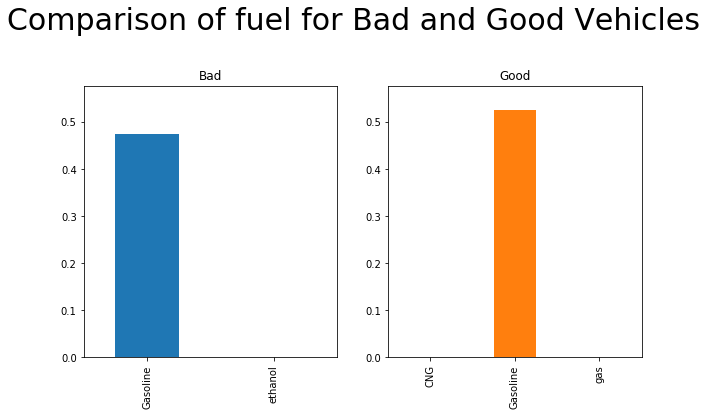

In [108]:
class_plot(df_08_bad_perf, df_08_good_perf, 'Bad', 'Good', 'fuel')

This class might be more evident in 2018, where the groups are less concentrated in Gasoline and are more distributed in other fuel types.

### Checking Data from 2018 to check if it corroborates to 2008

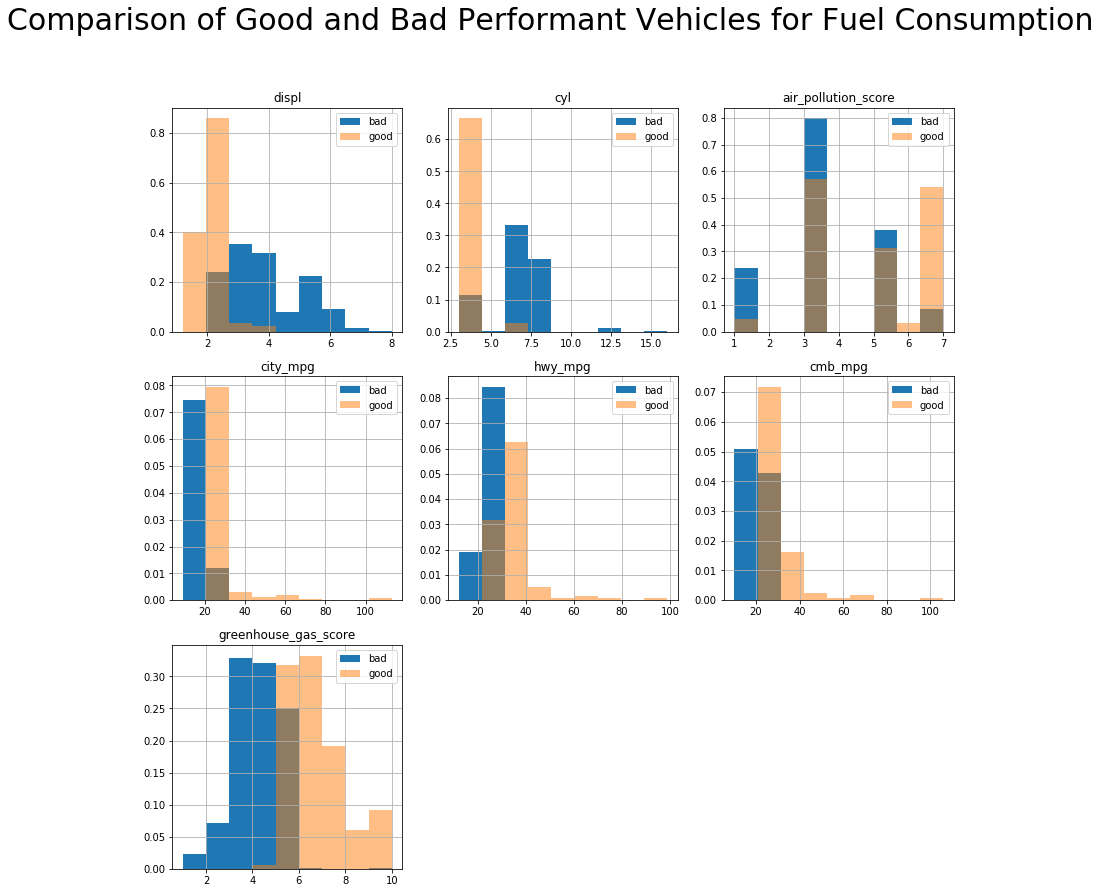

In [110]:
chart_title = "Comparison of Good and Bad Performant Vehicles for Fuel Consumption"
hist_comp_prop('fuel_performance', df_18_good_perf, df_18_bad_perf, chart_title)

Basically what changed from one period to another were the values, because the distribution is quite similar.

## Checking if the vehicle class might have an influence in the performance

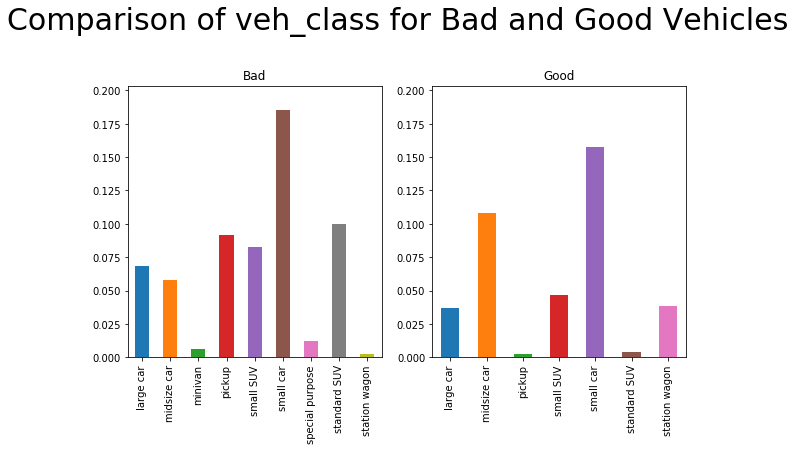

In [111]:
class_plot(df_18_bad_perf, df_18_good_perf, 'Bad', 'Good', 'veh_class')


In 2018, the vehicle class is less evident to be a good performant vehicle. Specially because the small class has the strongest weight in both groups. Thus, either we find another feature more evident or combine the vehicle class to another feature to identify a good performant vehicle. 
Another point to consider is the fact that we didn't take in consideration the standard deviation nor other performance values for other applications like highways or city.
Therefore, a deeper investigation should be carried out in this aspect.

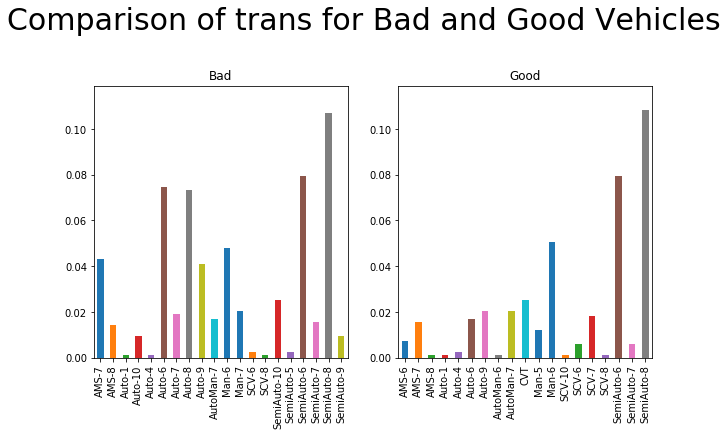

In [113]:
class_plot(df_18_bad_perf, df_18_good_perf, 'Bad', 'Good', 'trans')

Even worse than 2008 data. More groups with almost even distribution

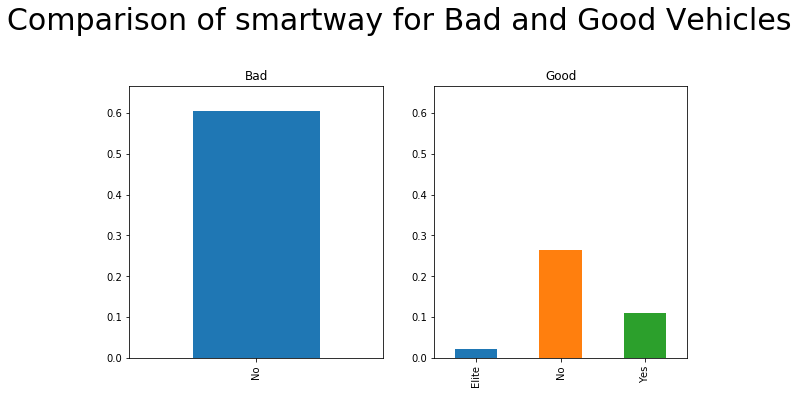

In [116]:
class_plot(df_18_bad_perf, df_18_good_perf, 'Bad', 'Good', 'smartway')

Despite the heaviest value in the good performant doesn't have SmartWay system, the vehicles with SmartWay are not present in the bad performant group. Thus, we can assume this is a strong feature, but not the only one.

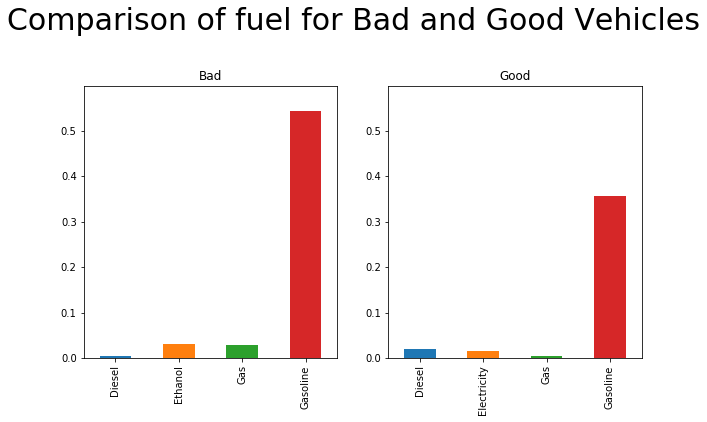

In [117]:
class_plot(df_18_bad_perf, df_18_good_perf, 'Bad', 'Good', 'fuel')

As expected more elements in the distribution, but still Gasoline has the biggest weight in both groups.
